In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir(r"/Users/midhunshah/Documents/phytodrift")

firstdata = pd.read_csv("first_data.csv")

In [5]:
import os
os.chdir(r"/Users/midhunshah/Documents/phytodrift/opendrift")

from phyt_growth import phyt_growth

# for row in firstdata.itertuples(index=False):
#     P  = np.random.rand(50, 50, 20)
#     I  = np.random.rand(50, 50, 20)
#     N  = row.no3
#     Ph = row.po4
#     Fe = row.fe
#     Si = row.si
#     T  = row.sea_water_temperature
#     firstdata['growth'] = phyt_growth(P, I, N, Ph, Fe, Si, T)


growth_values = []

for row in firstdata.itertuples(index=False):
    P  = row.no3 * 1.2
    I  = row.no3 * 32
    N  = row.no3
    Ph = row.po4
    Fe = row.fe
    Si = row.si
    T  = row.sea_water_temperature

    g = phyt_growth(P, I, N, Ph, Fe, Si, T)
    growth_values.append(g)

firstdata["growth"] = growth_values


#firstdata['growth'].row = result['dPd[t']

In [6]:
firstdata["growth"]

0        0.00074
1        0.00074
2        0.00074
3        0.00074
4        0.00074
          ...   
19051    0.00074
19052    0.00074
19053    0.00074
19054    0.00074
19055    0.00074
Name: growth, Length: 19056, dtype: float64

In [7]:
result['dPdt']

NameError: name 'result' is not defined

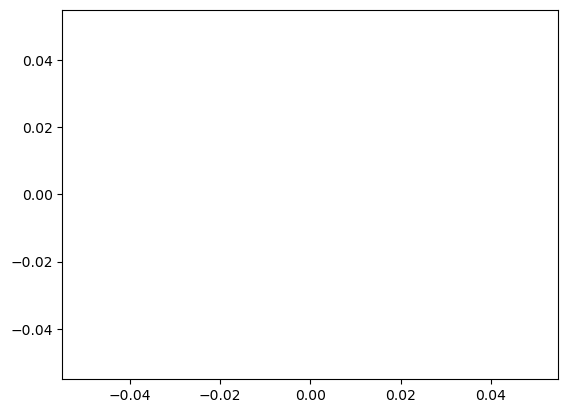

In [ ]:
import matplotlib.pyplot as plt

plt.plot(firstdata['growth'].abs())

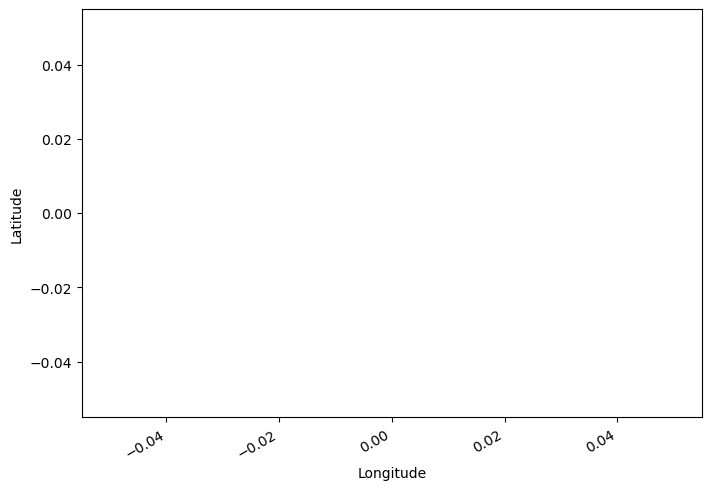

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# convert time column to datetimes and to matplotlib numeric values for coloring
# times = pd.to_datetime(firstdata['time'])
# time_nums = mdates.date2num(times)

plt.figure(figsize=(8, 6))
sc = plt.scatter(firstdata['lon'].values,firstdata['lat'].values,c = np.nan_to_num(firstdata['growth'], nan=0.0),marker='o', s=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# # Add a colorbar showing the time (formatted)
# cbar = plt.colorbar(sc)
# cbar.set_label('time')
# cbar_ticks = cbar.get_ticks()
# cbar.ax.set_yticklabels([mdates.num2date(t).strftime('%Y-%m-%d\n%H:%M') for t in cbar_ticks])

plt.gcf().autofmt_xdate()
plt.show()
